In [17]:
import pandas as pd
df = pd.read_csv("surveyDataSience.csv", skiprows=[1], header = 0, low_memory=False)

1. S-a efectuat un studiu despre starea domeniului Data Science, iar datele colectate sunt salvate in fisierul "data/surveyDataScience.csv".

1.a. Sa se stabileasca:

numarul de respondenti (de la care s-au colectate informatiile)

In [18]:
df.shape[0]

25973

numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent

In [19]:
number = df.shape[1]
print(number)
df.dtypes

369


Time from Start to Finish (seconds)      int64
Q1                                      object
Q2                                      object
Q3                                      object
Q4                                      object
                                        ...   
Q38_B_Part_8                            object
Q38_B_Part_9                            object
Q38_B_Part_10                           object
Q38_B_Part_11                          float64
Q38_B_OTHER                             object
Length: 369, dtype: object

numarul de respondenti pentru care se detin date complete

In [20]:
df.dropna().shape[0]

0

durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata),
durata medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii din Romania care sunt femei.
Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.

In [21]:
# df['Q4'].value_counts()  # pentru a vedea toate frecventele studiilor care apar
education_years = {
    "Master’s degree": 5,
    "Bachelor’s degree": 3,
    "Doctoral degree": 8,
    "Some college/university study without earning a bachelor’s degree": 1,
    "I prefer not to answer": 0,
    "No formal education past high school": 0,
    "Professional doctorate": 9
}
all_avg = df["Q4"].map(education_years).mean()

df_roumania = df[df['Q3'] == 'Romania']
roumania_avg = df_roumania['Q4'].map(education_years).mean()

df_roumania_women = df[ (df['Q2'] == 'Woman') & (df['Q3'] == 'Romania')]
roumania_women_avg = df_roumania_women['Q4'].map(education_years).mean()

print(all_avg)
print(roumania_avg)
print(roumania_women_avg)

4.147229815577715
4.688524590163935
5.375


numarul de respondenti femei din Romania pentru care se detin date complete

In [22]:
df_roumania_women.dropna().shape[0]

0

numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.

In [23]:
numarul_de_femei_python = df_roumania_women[df_roumania_women['Q7_Part_1'] == 'Python']['Q1'].count()
interval_python = df_roumania_women[df_roumania_women['Q7_Part_1'] == 'Python']['Q1'].value_counts().idxmax()
print("Numarul de femei care programeaza in Python este: {}".format(numarul_de_femei_python))
print("Intervalul este: {}".format(interval_python))

numarul_de_femei_Cpp = df_roumania_women[df_roumania_women['Q7_Part_5'] == 'C++']['Q1'].count()
interval_Cpp = df_roumania_women[df_roumania_women['Q7_Part_5'] == 'C++']['Q1'].value_counts().idxmax()
print("Numarul de femei care programeaza in C++ este: {}".format(numarul_de_femei_Cpp))
print("Intervalul este: {}".format(interval_Cpp))

Numarul de femei care programeaza in Python este: 12
Intervalul este: 35-39
Numarul de femei care programeaza in C++ este: 4
Intervalul este: 18-21


domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [24]:
print("de revenit")
dictionar = {}

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        dictionar[col] = {
            "min": df[col].min(),
            "max": df[col].max(),
            "mean": df[col].unique()
        }
    else:
        dictionar[col] = {
            "min": df[col].unique(),
            "max": df[col].unique(),
        }
print("Domeniul valorilor")

for key, value in dictionar.items():
    print(f"{key}: {value}")
    print()

de revenit
Domeniul valorilor
Time from Start to Finish (seconds): {'min': np.int64(120), 'max': np.int64(2488653), 'mean': array([  910,   784,   924, ..., 69978, 96354, 40250], shape=(4421,))}

Q1: {'min': array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object), 'max': array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object)}

Q2: {'min': array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object), 'max': array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)}

Q3: {'min': array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam',

transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?

In [25]:
df['Q6'].value_counts()

vechime = {
    "1-3 years": 2.0,
    "< 1 years": 0.5,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 32.5,
    "I have never written code": 0
}

df_vechime = df['Q6'].map(vechime)

minim = df_vechime.min()
maxim = df_vechime.max()
media = df_vechime.mean()
momentul_1 = df_vechime.mean()
momentul_2 = df_vechime.var()
deviatia_standard = df_vechime.std()
mediana = df_vechime.median()

print("Maximm este: {}".format(maxim))
print("Minim este: {}".format(minim))
print("Media este: {}".format(media))
print("Momentul 1 este: {}".format(momentul_1))
print("Momentul 2 este: {}".format(momentul_2))
print("Deviatia standard este: {}".format(deviatia_standard))
print("Mediana este: {}".format(mediana))
df_vechime



Maximm este: 25.0
Minim este: 0.0
Media este: 5.281061101913526
Momentul 1 este: 5.281061101913526
Momentul 2 este: 46.1163658538438
Deviatia standard este: 6.79090316922895
Mediana este: 2.0


0         7.5
1        25.0
2         2.0
3        25.0
4         0.5
         ... 
25968     2.0
25969     2.0
25970     0.0
25971     7.5
25972     0.0
Name: Q6, Length: 25973, dtype: float64

1.b. Sa se vizualizeze:


distributia respondentilor care programeaza in Python pe categorii de varsta

Q1
18-21    4420
22-24    4204
25-29    4283
30-34    2805
35-39    1978
40-44    1486
45-49    1054
50-54     714
55-59     434
60-69     400
70+        82
Name: count, dtype: int64


<Axes: xlabel='Q1'>

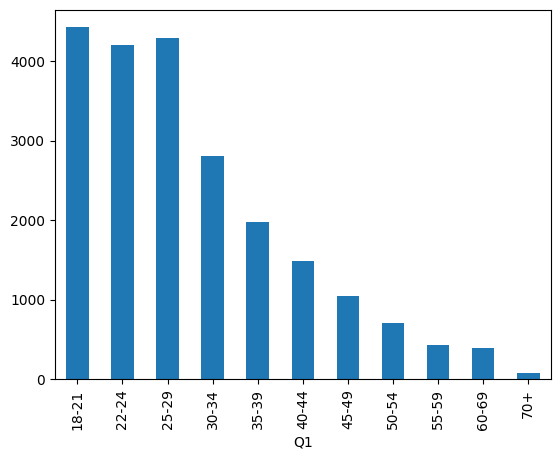

In [26]:
from matplotlib import pyplot as plt

distributie_varsta_python = df[df['Q7_Part_1']=='Python']['Q1'].value_counts().sort_index()
print(distributie_varsta_python)
distributie_varsta_python.plot(kind='bar')


distributia respondentilor din Romania care programeaza in Python pe categorii de varsta

Q1
18-21     3
22-24    11
25-29     7
30-34     6
35-39     8
40-44     8
45-49     4
50-54     4
Name: count, dtype: int64


<Axes: xlabel='Q1'>

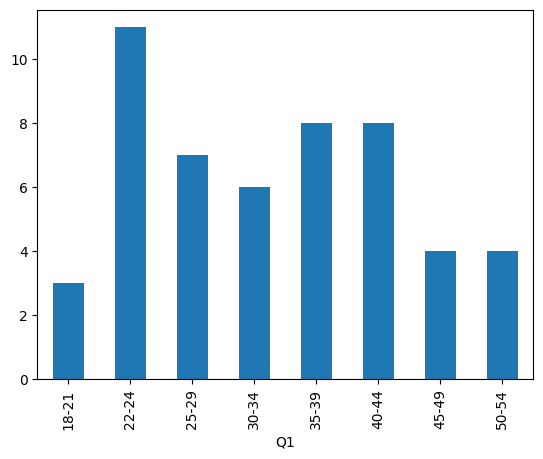

In [27]:
distributie_varsta_python_romania = df[(df['Q7_Part_1']=='Python') & (df['Q3']=='Romania')]['Q1'].value_counts().sort_index()
print(distributie_varsta_python_romania)
distributie_varsta_python_romania.plot(kind='bar')

distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta

Q1
18-21    1
22-24    3
25-29    2
35-39    5
40-44    1
Name: count, dtype: int64


<Axes: xlabel='Q1'>

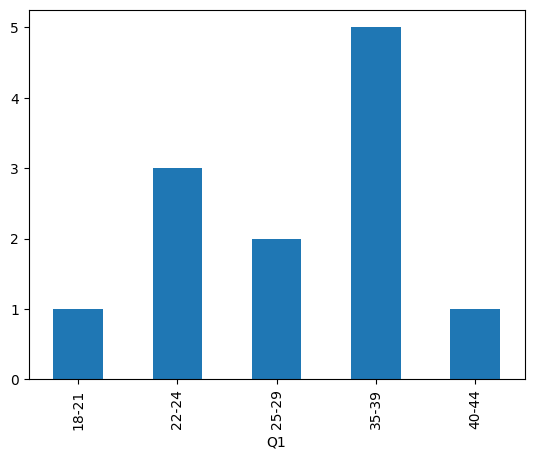

In [28]:
distributie_varsta_python_romania_femei = df[(df['Q7_Part_1']=='Python') & (df['Q3']=='Romania') & (df['Q2']=='Woman')]['Q1'].value_counts().sort_index()
print(distributie_varsta_python_romania_femei)
distributie_varsta_python_romania_femei.plot(kind='bar')

<Axes: >

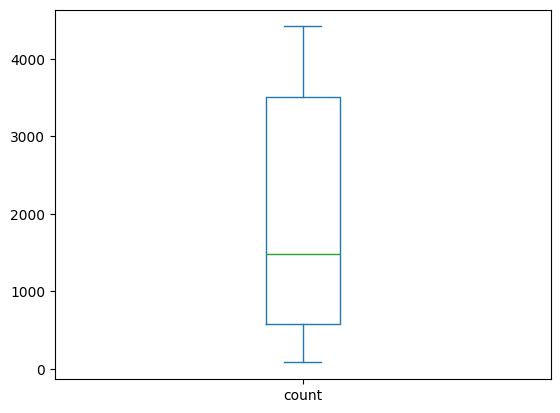

In [29]:
df['Q1'].value_counts()
distributie_varsta_python.plot(kind='box')